In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## 1. Familiarize
#### Shape
114,000 x 21
<br>
#### Nulls: 
One records with 3 nulls, will drop because doesn't impact data much.
<br>
#### Note
Songs are non-unique, can appear more than once due to fitting in multiple genres. If we don't include genre, we can condense these records into 1. 
#### Columns 
- track_id: object 
- artists: object
- album_name: object
- track_name: object
- popularity: int
- duration_ms: int
- explicit: bool
- energy: int
- key: int (change to category) 
- loudness: float
- mode: int (change to category)
- speechiness: float
- acousticness: float
- instrumentalness: float
- liveness: float
- valence: float
- tempo: float
- time_signature: int (change to cat) 
- track_genre: object 


In [21]:
data = pd.read_csv('dataset.csv')
data = data.drop('Unnamed: 0', axis=1)

In [22]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
data.shape

(114000, 21)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


In [27]:
data.describe(include='object').T

,count,unique,top,freq
track_id,114000,89741,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113999,31437,The Beatles,279
album_name,113999,46589,Alternative Christmas 2022,195
track_name,113999,73608,Run Rudolph Run,151
track_genre,114000,114,acoustic,1000


In [31]:
data[data['track_id']=='6S3JlDAGk3uu3NtZbPnuhS']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


In [29]:
data.groupby('track_id').mean()

/var/folders/jk/pgjk_zys001_s284g_c6wyww0000gn/T/ipykernel_1856/1561231534.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('track_id').mean()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_id,,,,,,,,,,,,,,,
0000vdREvCVMxbQTkS888c,44.0,160725.0,1.0,0.910,0.37400,8.0,-9.844,0.0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4.0
000CC8EParg64OmTxVnZ0p,47.0,322933.0,0.0,0.269,0.51600,0.0,-7.361,1.0,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4.0
000Iz0K615UepwSJ5z2RE5,22.0,515360.0,0.0,0.686,0.56000,5.0,-13.264,0.0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4.0
000RDCYioLteXcutOjeweY,62.0,190203.0,0.0,0.679,0.77000,0.0,-3.537,1.0,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4.0
000qpdoc97IMTBvF8gwcpy,19.0,331240.0,0.0,0.519,0.43100,6.0,-13.606,0.0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zxHiMmVLt4LGWpOMqOpUh,56.0,325156.0,0.0,0.766,0.38200,7.0,-11.464,0.0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4.0
7zxpdh3EqMq2JCkOI0EqcG,23.0,109573.0,0.0,0.529,0.00879,10.0,-32.266,1.0,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4.0
7zyYmIdjqqiX6kLryb7QBx,61.0,260573.0,0.0,0.423,0.36000,3.0,-9.458,1.0,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4.0


In [35]:
data[data.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [54]:
data[data['tempo']==0]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.0,0.03620,0,-22.519,0,0.0,0.994000,0.940,0.0958,0.0,0.0,0,ambient
4379,4acmzQsAeMJa5sGFSog7fu,Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,The End of Childhood (feat. Jack Liebeck),55,73266,False,0.0,0.04450,0,-26.440,0,0.0,0.972000,0.972,0.0873,0.0,0.0,0,ambient
4664,1Kb2DqjHRvOcT5xeWtz3t5,Sylvain Chauveau,Des Plumes Dans La Tête,Ferme Les Yeux,53,68493,False,0.0,0.03230,2,-23.636,0,0.0,0.994000,0.973,0.0922,0.0,0.0,0,ambient
45670,6B9Mgf9smWqxDjA35VD6MK,Little Symphony,Rialto Beach,Campomoro,22,148711,False,0.0,0.00108,0,-30.204,1,0.0,0.952000,0.991,0.2420,0.0,0.0,0,guitar
45720,7i5OoyPXtSrqz9jobJfG1F,Little Symphony,Rialto Beach,Ritornello,23,102000,False,0.0,0.00129,7,-29.445,1,0.0,0.969000,0.956,0.1230,0.0,0.0,0,guitar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101988,5gEKRH0MCSegG8ZISUPaU2,Granular,The World Of,Tin White Noise,32,182050,False,0.0,0.00002,1,-16.187,1,0.0,0.003850,0.903,0.9210,0.0,0.0,0,sleep
101993,6H0kAiSAFB84jX7dgEDWd6,Rain Sounds,Rain,Rain: Natural Recording,32,84219,False,0.0,0.02540,8,-19.925,1,0.0,0.000002,0.838,0.3390,0.0,0.0,0,sleep
113428,5EYzrykQ95uOmepteDi9KT,El Ruido Blanco;Soñoliento Juan;Mantra para Do...,Aire Acondicionado de Ruido Blanco,Aire de verano,27,128000,False,0.0,0.18800,8,-25.837,0,0.0,0.139000,0.339,0.1220,0.0,0.0,0,world-music
113688,2EnZf7wbFv7ST4CJ3EvNzT,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,Ruido Rosa Puro - Una Hora Versión,24,3601693,False,0.0,0.00002,1,-11.165,1,0.0,0.186000,1.000,0.3620,0.0,0.0,0,world-music


## 2. Clean up
#### Target variable
Choosing popularity. Seems to be normalized between 0-100

#### Predictors

Text(0, 0.5, 'Count')

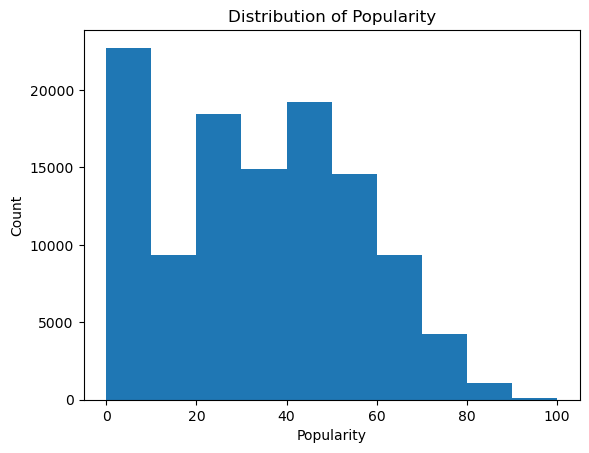

In [50]:
plt.hist(data['popularity'], bins=10)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')

(array([1.12776e+05, 1.12200e+03, 5.80000e+01, 1.30000e+01, 5.00000e+00,
        8.00000e+00, 5.00000e+00, 4.00000e+00, 5.00000e+00, 4.00000e+00]),
 array([      0. ,  523729.5, 1047459. , 1571188.5, 2094918. , 2618647.5,
        3142377. , 3666106.5, 4189836. , 4713565.5, 5237295. ]),
 <BarContainer object of 10 artists>)

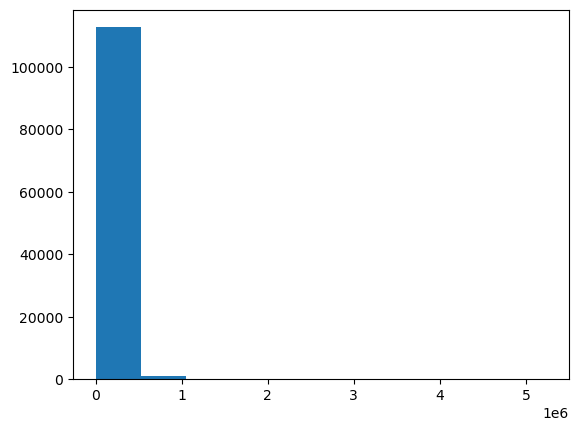

In [51]:
plt.hist(data['duration_ms'])